<div style="font-size: 20px">
1.	Based on the first and second law, derive the Fundamental Property Equation (FPE) for pure component and explain what it means for a definition of the internal energy. What will change in this equation if it will be written for mixture of components?

In [1]:
## Write your answer here
## Choose "Code" mode to calculate something using Python
## Or swith the mode from "Code" to "Markdown" when you try to insert texts, equations (Latex style) and figures
## If it is necessary, you can add extra cells below to represent your answer in a neaty way

<div style="font-size: 20px">
2. A thermodynamic property characterizing the phase state is shown in the figure below.

    a.	Which thermodynamic property is show in the figure?
    
    b.	What is changing between (a) to (d)? How is it changing?
    
    c.	Name each thermodynamic state related to each figure. 
    
    d.	Explain why this thermodynamic property is mostly used to describe phase behavior 


<img style="float: left;" src="Gibbs.jpg" width="100%">

In [2]:
## Write your answer here
## Choose "Code" mode to calculate something using Python
## Or swith the mode from "Code" to "Markdown" when you try to insert texts, equations (Latex style) and figures
## If it is necessary, you can add extra cells below to represent your answer in a neaty way

<div style="font-size: 20px">
3. One of the main applications of nonlinear least squares is nonlinear regression or curve fitting. That is by given pairs ${(t_i,y_i) i=1,...,n}$ estimate parameters $X$ defining a nonlinear function $\varphi(t;X)$, assuming the model:
\begin{equation}
y_i = \varphi(t_i;X) + \epsilon_i
\end{equation}
where $\epsilon_i$ is the measurement (observation) errors. In the least-squares estimation we search $X$ as the solution of the following optimization problem:
\begin{equation}
\frac{1}{2}\sum_{i=1}^{n}(\varphi(t_i;X) - y_i)^2\rightarrow\min_x
\end{equation}
Such formulation is intuitive and convinient from mathematical point of view. From the probabilistic point of view the least-squares solution is known to be the maximum likelihood estimate, provided that all $\epsilon_i$ are independent and normally distributed random variables.

  So theoretically it is not optimal when $\epsilon_i$ have distribution other than normal. Although in engineering practice it is usally not important, i.e. if errors behave as some reasonable random variables with zero mean a result of least-squares estimation will be satisfactory.
     
  Please use the vaporization data we provide in the table "data.xlsx" to fit Antoine equation. In this exercise, a small noise is added in the data.

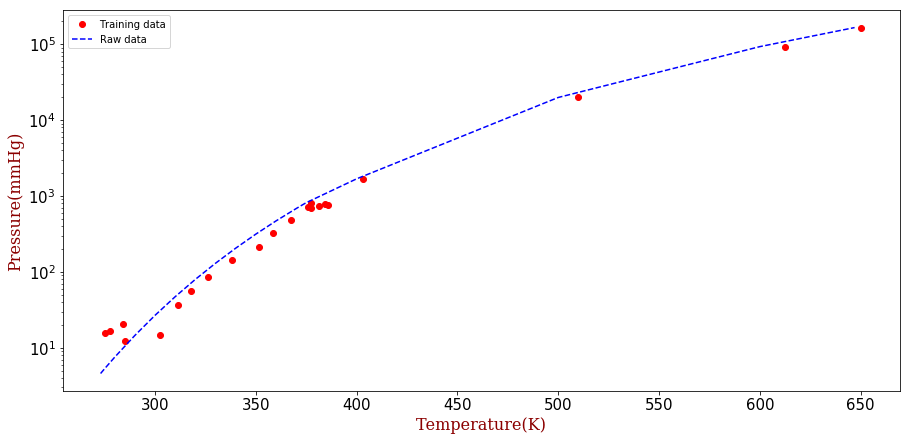

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

%matplotlib inline

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# 1) sublimation curve, units in the table: T-Kelvin, P-mmHg
# data_sub = pd.read_excel(r'data.xlsx', sheet_name='Sublimation Curve')
data_sub = pd.read_excel(r'data.xlsx', sheet_name='Vaporization Curve')


# 2) add a small perturbation 
error = np.random.random((data_sub['T'].size,len(data_sub.dtypes)))
noise = 13
data = data_sub + noise * error

# plot and compare the data_sub and data
plt.figure(figsize=(15, 7))
plt.semilogy(data['T'],data['P'],'ro')
plt.semilogy(data_sub['T'],data_sub['P'],'b--')
plt.tick_params(labelsize=15)
plt.xlabel('Temperature(K)', fontdict=font)
plt.ylabel('Pressure(mmHg)', fontdict=font)
plt.legend(['Training data','Raw data'])
plt.show()

In [4]:
# Define model parameters
# T_min = -100          # celsius
# T_max =   0           # celsius
T_min = 0         # celsius
T_max = 374           # celsius
T = np.linspace(T_min, T_max, 100)

In [5]:
# Define the function computing residuals for least-squares minimization:
# Recall Antoine equation to construct 'fobj' below
def fobj(C, T, P):
    return C[0] - C[1]/ (T + C[2] - 273.15) - np.log10(P)

In [6]:
# Use all ones as the initial estimate.
C = np.ones(3)

# Run robust least squares with loss='soft_l1', set f_scale to 0.1 
# which means that inlier residuals are approximately lower than 0.1.
res_robust = least_squares(fobj, C, loss='soft_l1', f_scale=0.1, args=(data['T'], data['P']))

print('Antoine coefficients : A = %0.2f, B = %0.2f, C = %0.2f'%(res_robust.x[0],res_robust.x[1],res_robust.x[2]))

Antoine coefficients : A = 9.58, B = 3294.17, C = 381.19


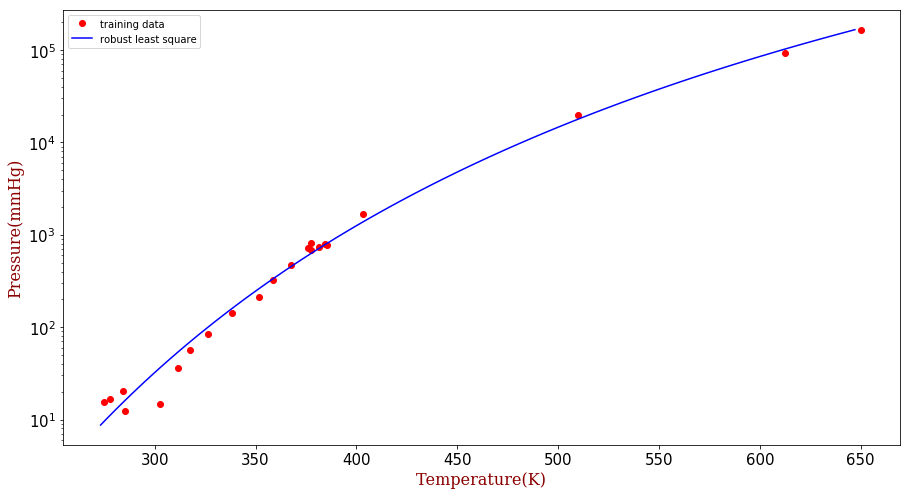

In [7]:
# visualize your results
p_robust = 10**(res_robust.x[0] - res_robust.x[1]/(res_robust.x[2] + T))

plt.figure(figsize=(15, 8))
plt.semilogy(data['T'],data['P'],'ro', label = 'training data')
plt.semilogy(T + 273.15,p_robust,'b-', label = 'robust least square')
plt.tick_params(labelsize=15)
plt.xlabel('Temperature(K)', fontdict=font)
plt.ylabel('Pressure(mmHg)', fontdict=font)
plt.legend()
plt.show()